<a href="https://colab.research.google.com/github/sanabriadiego/s-14-24/blob/main/s_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('Datos Challenge limpios.csv')

In [5]:
df

,ID_Legal,Nombre_de_Compania,Domicilio,Ciudad,Provincia,Region,Tipo_Producto,Precio,Fecha,Compania_Bandera,Latitud,Longitud
0,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,172.5,01/10/2022,PUMA,-34.658476,-58.529443
1,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Gasoil Grade 3,219.0,01/10/2022,PUMA,-34.658476,-58.529443
2,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,63.9,05/09/2022,PUMA,-34.658476,-58.529443
3,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,188.8,01/10/2022,PUMA,-34.658476,-58.529443
4,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,Pretol Undeladed - 95/98 Octane,154.6,01/10/2022,PUMA,-34.658476,-58.529443
...,...,...,...,...,...,...,...,...,...,...,...,...
18536,33-70824089-9,ZONA CERO S.A,RIVADAVIA Nº 38,COMODORO RIVADAVIA,CHUBUT,PATAGONIA,Pretol Undeladed - 95/98 Octane,132.7,17/01/2023,AXION,-45.862240,-67.474970
18537,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,395.7,27/10/2023,PUMA,-38.031169,-57.575518
18538,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,199.0,26/10/2023,PUMA,-38.031169,-57.575518
18539,30-70795820-7,ZUSICO S.A.,TALCAHUANO 1198,MAR DEL PLATA,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,449.2,27/10/2023,PUMA,-38.031169,-57.575518


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Legal            18541 non-null  object 
 1   Nombre_de_Compania  18541 non-null  object 
 2   Domicilio           18541 non-null  object 
 3   Ciudad              18541 non-null  object 
 4   Provincia           18541 non-null  object 
 5   Region              18541 non-null  object 
 6   Tipo_Producto       18541 non-null  object 
 7   Precio              18541 non-null  float64
 8   Fecha               18541 non-null  object 
 9   Compania_Bandera    18541 non-null  object 
 10  Latitud             18541 non-null  float64
 11  Longitud            18541 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.7+ MB


In [7]:
df['Ciudad']

0         LOMAS DEL MIRADOR
1         LOMAS DEL MIRADOR
2         LOMAS DEL MIRADOR
3         LOMAS DEL MIRADOR
4         LOMAS DEL MIRADOR
                ...        
18536    COMODORO RIVADAVIA
18537         MAR DEL PLATA
18538         MAR DEL PLATA
18539         MAR DEL PLATA
18540         MAR DEL PLATA
Name: Ciudad, Length: 18541, dtype: object

In [8]:
columns_to_drop = ['ID_Legal', 'Nombre_de_Compania', 'Domicilio', 'Ciudad']

In [9]:
df2 = df.drop(columns_to_drop, axis=1)

In [10]:
df2

,Provincia,Region,Tipo_Producto,Precio,Fecha,Compania_Bandera,Latitud,Longitud
0,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,172.5,01/10/2022,PUMA,-34.658476,-58.529443
1,BUENOS AIRES,PAMPEANA,Gasoil Grade 3,219.0,01/10/2022,PUMA,-34.658476,-58.529443
2,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,63.9,05/09/2022,PUMA,-34.658476,-58.529443
3,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,188.8,01/10/2022,PUMA,-34.658476,-58.529443
4,BUENOS AIRES,PAMPEANA,Pretol Undeladed - 95/98 Octane,154.6,01/10/2022,PUMA,-34.658476,-58.529443
...,...,...,...,...,...,...,...,...
18536,CHUBUT,PATAGONIA,Pretol Undeladed - 95/98 Octane,132.7,17/01/2023,AXION,-45.862240,-67.474970
18537,BUENOS AIRES,PAMPEANA,Gasoil Grade 2,395.7,27/10/2023,PUMA,-38.031169,-57.575518
18538,BUENOS AIRES,PAMPEANA,Compressed Natural Gas,199.0,26/10/2023,PUMA,-38.031169,-57.575518
18539,BUENOS AIRES,PAMPEANA,Pretol Premium - 95 Octane,449.2,27/10/2023,PUMA,-38.031169,-57.575518


In [11]:
lista_provincias = df2['Provincia'].unique()

In [12]:
print(lista_provincias)

['BUENOS AIRES' 'CHUBUT' 'SAN LUIS' 'SANTA FE' 'ENTRE RIOS' 'RIO NEGRO'
 'CHACO' 'SANTIAGO DEL ESTERO' 'MENDOZA' 'CORDOBA' 'SALTA' 'MISIONES'
 'TUCUMAN' 'CORRIENTES' 'LA PAMPA' 'CAPITAL FEDERAL' 'SANTA CRUZ'
 'CATAMARCA' 'NEUQUEN' 'JUJUY' 'FORMOSA' 'SAN JUAN' 'LA RIOJA'
 'TIERRA DEL FUEGO']


In [13]:
dict_provincias = {}
#index represents the count that enumerate does
for index, provincia in enumerate(lista_provincias):
    dict_provincias[provincia] = index

print(dict_provincias)

{'BUENOS AIRES': 0, 'CHUBUT': 1, 'SAN LUIS': 2, 'SANTA FE': 3, 'ENTRE RIOS': 4, 'RIO NEGRO': 5, 'CHACO': 6, 'SANTIAGO DEL ESTERO': 7, 'MENDOZA': 8, 'CORDOBA': 9, 'SALTA': 10, 'MISIONES': 11, 'TUCUMAN': 12, 'CORRIENTES': 13, 'LA PAMPA': 14, 'CAPITAL FEDERAL': 15, 'SANTA CRUZ': 16, 'CATAMARCA': 17, 'NEUQUEN': 18, 'JUJUY': 19, 'FORMOSA': 20, 'SAN JUAN': 21, 'LA RIOJA': 22, 'TIERRA DEL FUEGO': 23}


In [14]:
lista_regiones = df2['Region'].unique()
print(lista_regiones)

['PAMPEANA' 'PATAGONIA' 'CUYO' 'CENTRO' 'NEA' 'NOA']


In [15]:
dict_regiones = {}
#index represents the count that enumerate does
for index, region in enumerate(lista_regiones):
    dict_regiones[region] = index

print(dict_regiones)

{'PAMPEANA': 0, 'PATAGONIA': 1, 'CUYO': 2, 'CENTRO': 3, 'NEA': 4, 'NOA': 5}


In [16]:
lista_productos = df2['Tipo_Producto'].unique()
print(lista_productos)

['Gasoil Grade 2' 'Gasoil Grade 3' 'Compressed Natural Gas'
 'Pretol Premium - 95 Octane' 'Pretol Undeladed - 95/98 Octane']


In [17]:
dict_productos = {}
#index represents the count that enumerate does
for index, producto in enumerate(lista_productos):
    dict_productos[producto] = index

print(dict_productos)

{'Gasoil Grade 2': 0, 'Gasoil Grade 3': 1, 'Compressed Natural Gas': 2, 'Pretol Premium - 95 Octane': 3, 'Pretol Undeladed - 95/98 Octane': 4}


In [18]:
lista_companias = df2['Compania_Bandera'].unique()
print(lista_companias)

['PUMA' 'SHELL C.A.P.S.A.' 'YPF' 'AXION' 'BLANCA' 'GULF' 'DAPSA S.A.'
 'REFINOR' 'SIN EMPRESA BANDERA' 'VOY' 'OIL COMBUSTIBLES S.A.']


In [19]:
dict_companias = {}
#index represents the count that enumerate does
for index, compania in enumerate(lista_companias):
    dict_companias[compania] = index

print(dict_companias)

{'PUMA': 0, 'SHELL C.A.P.S.A.': 1, 'YPF': 2, 'AXION': 3, 'BLANCA': 4, 'GULF': 5, 'DAPSA S.A.': 6, 'REFINOR': 7, 'SIN EMPRESA BANDERA': 8, 'VOY': 9, 'OIL COMBUSTIBLES S.A.': 10}


In [20]:
df2['Provincia'] = df2['Provincia'].map(dict_provincias)
df2['Region'] = df2['Region'].map(dict_regiones)
df2['Tipo_Producto'] = df2['Tipo_Producto'].map(dict_productos)
df2['Compania_Bandera'] = df2['Compania_Bandera'].map(dict_companias)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18541 non-null  int64  
 1   Region            18541 non-null  int64  
 2   Tipo_Producto     18541 non-null  int64  
 3   Precio            18541 non-null  float64
 4   Fecha             18541 non-null  object 
 5   Compania_Bandera  18541 non-null  int64  
 6   Latitud           18541 non-null  float64
 7   Longitud          18541 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.1+ MB


In [22]:
df2['Compania_Bandera'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'], format = '%d/%m/%Y', errors = 'coerce')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         18541 non-null  int64         
 1   Region            18541 non-null  int64         
 2   Tipo_Producto     18541 non-null  int64         
 3   Precio            18541 non-null  float64       
 4   Fecha             18541 non-null  datetime64[ns]
 5   Compania_Bandera  18541 non-null  int64         
 6   Latitud           18541 non-null  float64       
 7   Longitud          18541 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 1.1 MB


In [25]:
df2['Anio'] = df2['Fecha'].dt.year

In [26]:
df2['Mes'] = df2['Fecha'].dt.month

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Provincia         18541 non-null  int64         
 1   Region            18541 non-null  int64         
 2   Tipo_Producto     18541 non-null  int64         
 3   Precio            18541 non-null  float64       
 4   Fecha             18541 non-null  datetime64[ns]
 5   Compania_Bandera  18541 non-null  int64         
 6   Latitud           18541 non-null  float64       
 7   Longitud          18541 non-null  float64       
 8   Anio              18541 non-null  int32         
 9   Mes               18541 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(4)
memory usage: 1.3 MB


In [28]:
df2['Mes'].unique()

array([10,  9,  8,  6,  1, 12,  3,  2,  5,  4,  7, 11], dtype=int32)

In [29]:
df3 = df2.drop(['Fecha'], axis=1)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18541 entries, 0 to 18540
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         18541 non-null  int64  
 1   Region            18541 non-null  int64  
 2   Tipo_Producto     18541 non-null  int64  
 3   Precio            18541 non-null  float64
 4   Compania_Bandera  18541 non-null  int64  
 5   Latitud           18541 non-null  float64
 6   Longitud          18541 non-null  float64
 7   Anio              18541 non-null  int32  
 8   Mes               18541 non-null  int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 1.1 MB


In [31]:
df3.describe()

,Provincia,Region,Tipo_Producto,Precio,Compania_Bandera,Latitud,Longitud,Anio,Mes
count,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000
mean,5.694569,1.761987,1.996494,321.748134,2.299013,-33.401262,-61.590828,2022.744404,9.352948
std,6.096090,1.749968,1.507385,109.960590,1.586592,4.095790,3.612381,1.034875,1.715220
min,0.000000,0.000000,0.000000,7.000000,0.000000,-54.829501,-72.338930,2016.000000,1.000000
25%,0.000000,0.000000,1.000000,291.000000,1.000000,-34.791930,-64.264660,2023.000000,10.000000
50%,3.000000,1.000000,2.000000,339.000000,2.000000,-33.906430,-60.675087,2023.000000,10.000000
75%,9.000000,3.000000,3.000000,397.000000,3.000000,-31.442723,-58.552110,2023.000000,10.000000
max,23.000000,5.000000,4.000000,750.000000,10.000000,-22.055820,-53.648260,2023.000000,12.000000


<Axes: >

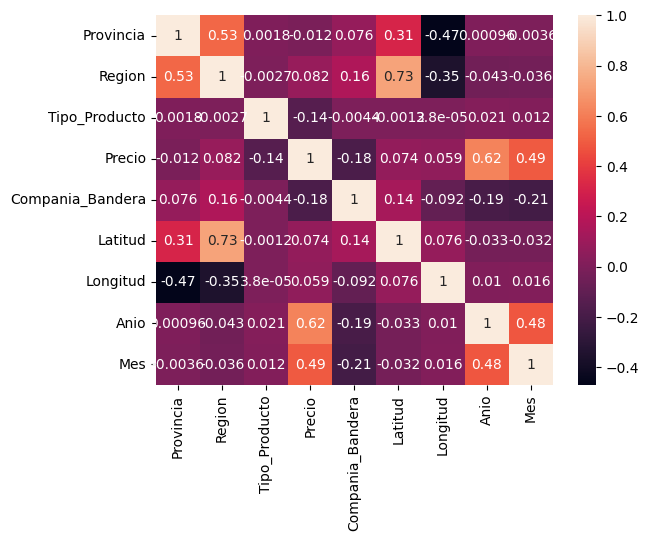

In [32]:
sns.heatmap(df3.corr(), annot=True)

ANÁLISIS DE ALGORITMOS

In [85]:
# X = df3[['Provincia', 'Region', 'Tipo_Producto', 'Compania_Bandera', 'Latitud', 'Longitud', 'Anio', 'Mes']]
# X = df3[['Provincia', 'Region', 'Tipo_Producto', 'Compania_Bandera', 'Anio', 'Mes']]
X = df3[['Region', 'Tipo_Producto', 'Compania_Bandera', 'Anio', 'Mes']]

y = df3['Precio'].astype(int)

In [114]:
X

,Region,Tipo_Producto,Compania_Bandera,Anio,Mes
0,0,0,0,2022,10
1,0,1,0,2022,10
2,0,2,0,2022,9
3,0,3,0,2022,10
4,0,4,0,2022,10
...,...,...,...,...,...
18536,1,4,3,2023,1
18537,0,0,0,2023,10
18538,0,2,0,2023,10
18539,0,3,0,2023,10


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [87]:
print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (14832, 5)
the shape of the training set (target) is: (14832,)

the shape of the test set (input) is: (3709, 5)
the shape of the test set (target) is: (3709,)


In [88]:
scaler = StandardScaler().fit(X_train)
x_train_norm = scaler.transform(X_train)

In [89]:
scaler_test = StandardScaler().fit(X_test)
x_test_norm = scaler.transform(X_test)

Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [92]:
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model.
    'copy_X': [True, False]  # Whether to copy X before fitting the model.
}

In [93]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [94]:
grid_result = grid_search.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [95]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -62.23720023175603
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}


In [96]:
model_lr = LinearRegression(copy_X = True, fit_intercept = True)

In [115]:
model_lr.fit(x_train_norm, y_train)

LinearRegression()

In [116]:
y_pred_lr = model_lr.predict(x_test_norm)

In [117]:
print(f'The MSE for Model Linear Regression is: {mean_squared_error(y_test, y_pred_lr)}')

The MSE for Model Linear Regression is: 6220.419242054879


In [118]:
print(f'The MAE for Model Linear Regression is: {mean_absolute_error(y_test, y_pred_lr)}')

The MAE for Model Linear Regression is: 61.14443871506309


In [119]:
print(f'The R2 score for Model Linear Regression is: {r2_score(y_test, y_pred_lr)}')

The R2 score for Model Linear Regression is: 0.4870561786240085


Ridge

In [102]:
from sklearn.linear_model import Ridge

In [103]:
r = Ridge()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [104]:
param_grid = {
    'solver' : ['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept' : [True, False]
}

In [105]:
grid_search = GridSearchCV(estimator=r, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [106]:
grid_result = grid_search.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [107]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -62.23719099769596
Best Hyperparameters: {'alpha': 0.0001, 'fit_intercept': True, 'solver': 'sag'}


In [108]:
model_r = Ridge(alpha= 0.0001, fit_intercept= True, solver= 'sag')

In [109]:
model_r.fit(x_train_norm, y_train)

Ridge(alpha=0.0001, solver='sag')

In [110]:
y_pred_r = model_r.predict(x_test_norm)

In [111]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_r)}')

The MSE for Model ridge is: 6220.4209905626585


In [112]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_r)}')

The MAE for Model ridge is: 61.1444449598965


In [113]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_r)}')

The R2 score for Model Ridge is: 0.48705603443979406


Support Vector Regression

In [120]:
from sklearn.svm import SVR

In [121]:
svr = SVR()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [122]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

In [123]:
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid_result = grid_search.fit(x_train_norm, y_train)

In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

In [ ]:
model_svr = SVR(C = 10, epsilon = 0.1, gamma = 'scale', kernel = 'rbf')

In [ ]:
model_svr.fit(X_train, y_train)

In [ ]:
y_pred_svr = model_r.predict(X_test)

In [ ]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_svr)}')

In [ ]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_svr)}')

In [ ]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_svr)}')

Neural Networks

In [125]:
import tensorflow as tf

In [126]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [127]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(5,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='relu')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='mean_squared_error')
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

#dropout layers helps prevent overfitting

16 nodes, dropout 0, lr 0.01, batch size 32


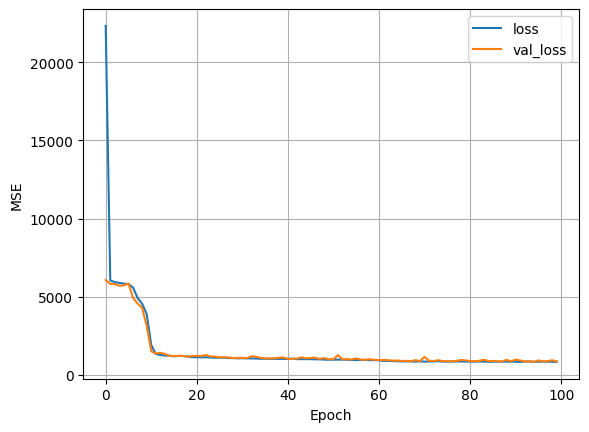

116/116 [==============================] - 0s 2ms/step - loss: 730.7577
16 nodes, dropout 0, lr 0.01, batch size 64


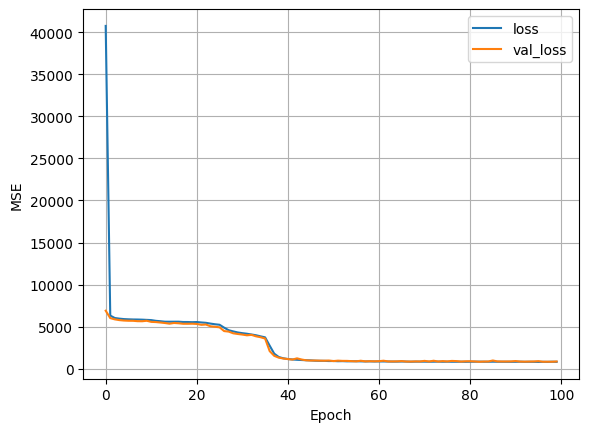

116/116 [==============================] - 0s 2ms/step - loss: 735.6505
16 nodes, dropout 0, lr 0.01, batch size 128


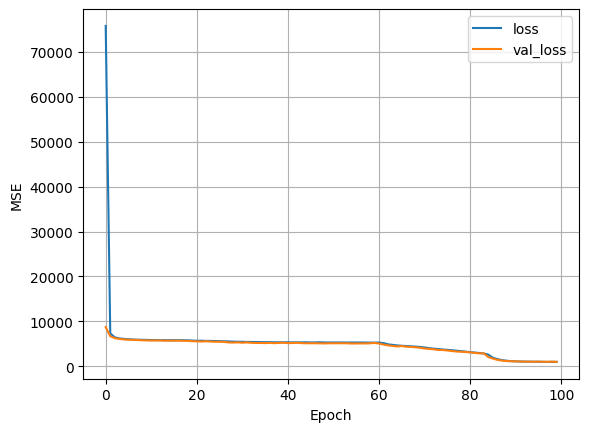

116/116 [==============================] - 0s 2ms/step - loss: 862.3524
16 nodes, dropout 0, lr 0.005, batch size 32


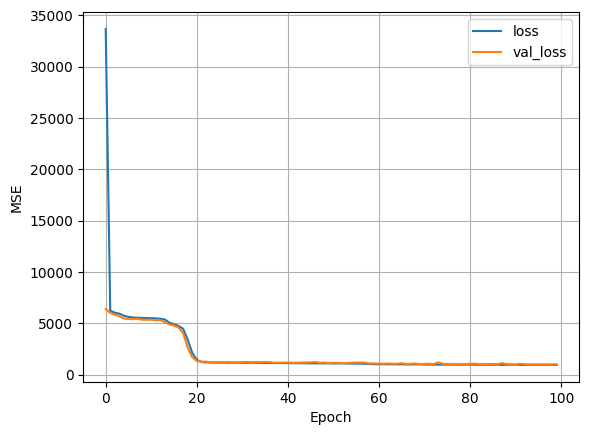

116/116 [==============================] - 0s 2ms/step - loss: 880.9279
16 nodes, dropout 0, lr 0.005, batch size 64


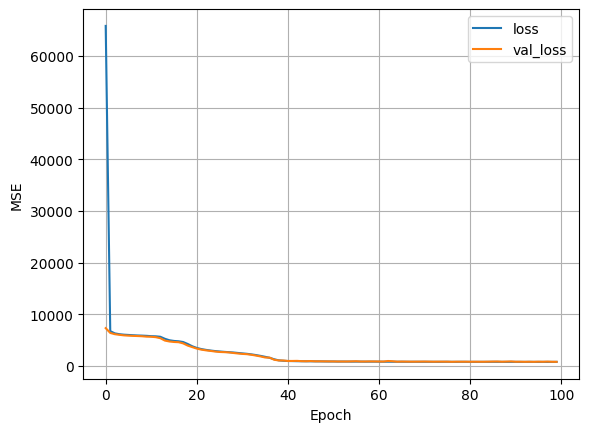

116/116 [==============================] - 0s 2ms/step - loss: 684.1585
16 nodes, dropout 0, lr 0.005, batch size 128


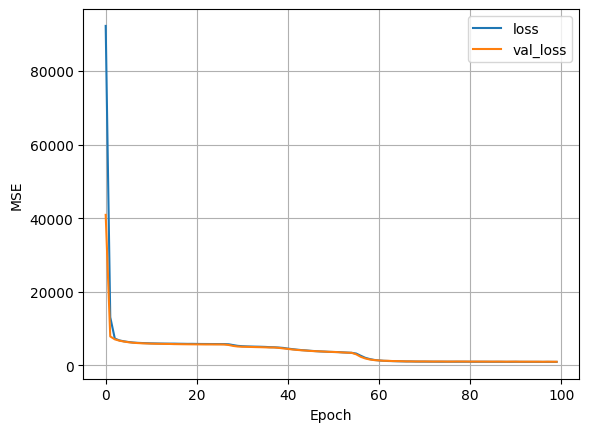

116/116 [==============================] - 0s 2ms/step - loss: 857.3342
16 nodes, dropout 0, lr 0.001, batch size 32


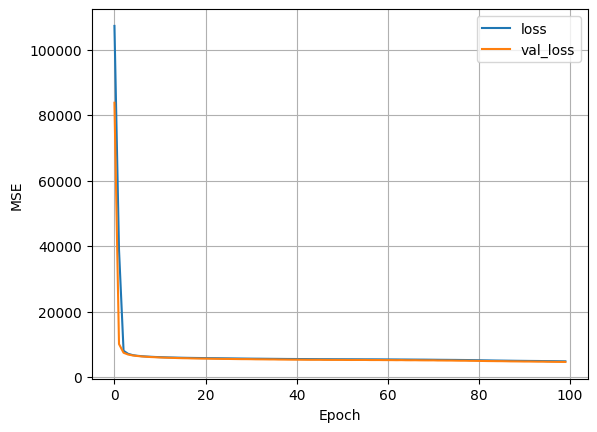

116/116 [==============================] - 0s 1ms/step - loss: 4676.5991
16 nodes, dropout 0, lr 0.001, batch size 64


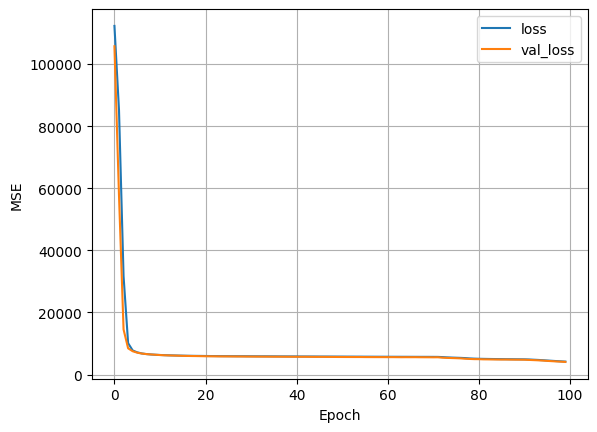

116/116 [==============================] - 0s 2ms/step - loss: 3830.5005
16 nodes, dropout 0, lr 0.001, batch size 128


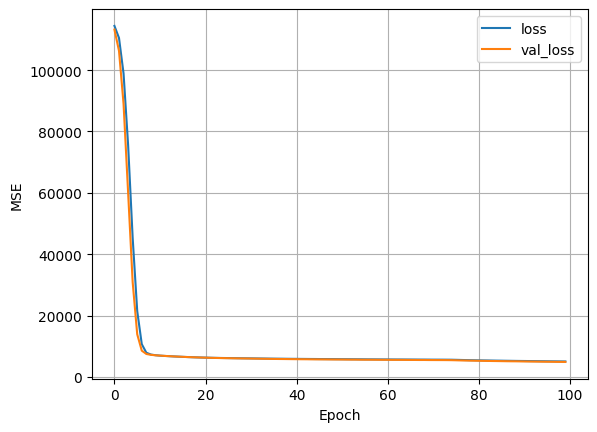

116/116 [==============================] - 0s 2ms/step - loss: 4709.6426
16 nodes, dropout 0.2, lr 0.01, batch size 32


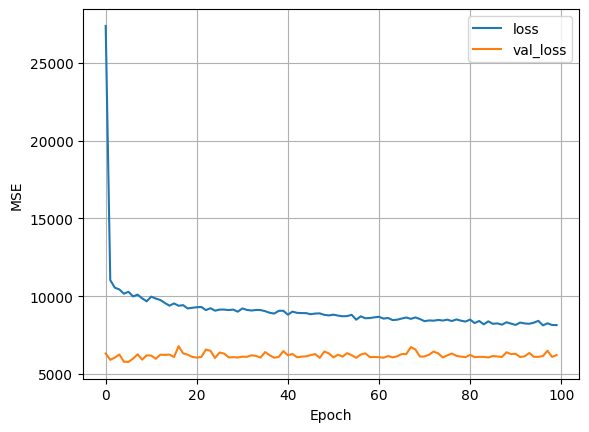

116/116 [==============================] - 0s 2ms/step - loss: 6064.6948
16 nodes, dropout 0.2, lr 0.01, batch size 64


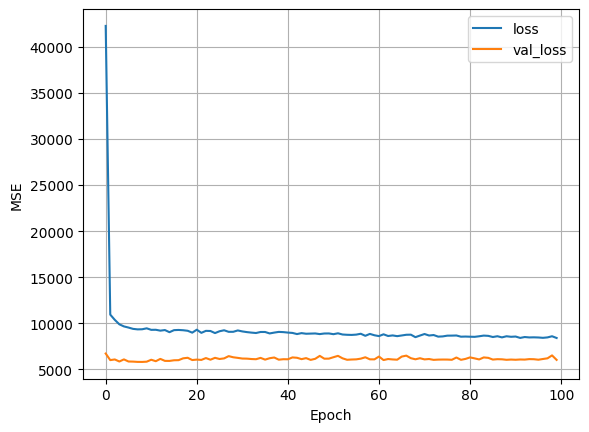

116/116 [==============================] - 0s 2ms/step - loss: 5820.9150
16 nodes, dropout 0.2, lr 0.01, batch size 128


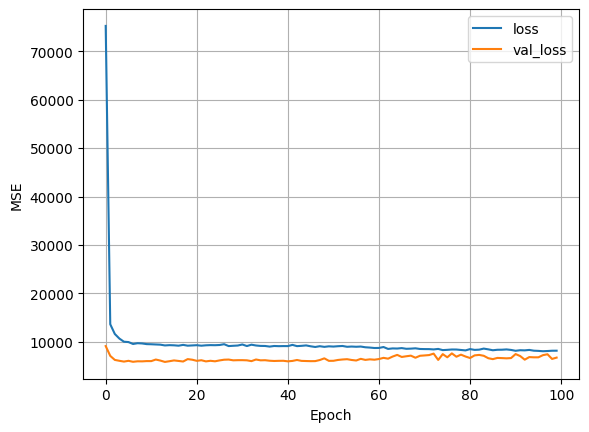

116/116 [==============================] - 0s 2ms/step - loss: 6673.0337
16 nodes, dropout 0.2, lr 0.005, batch size 32


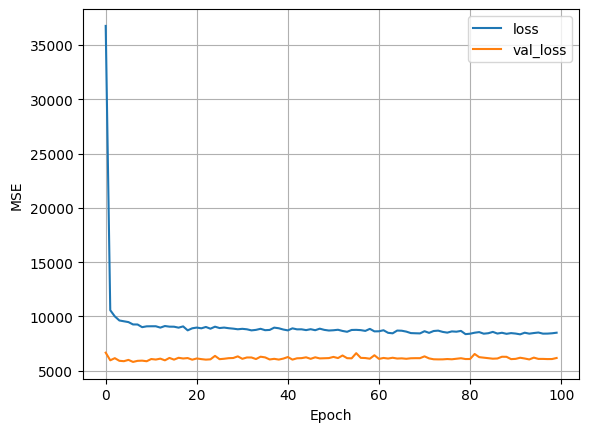

116/116 [==============================] - 0s 3ms/step - loss: 6010.3379
16 nodes, dropout 0.2, lr 0.005, batch size 64


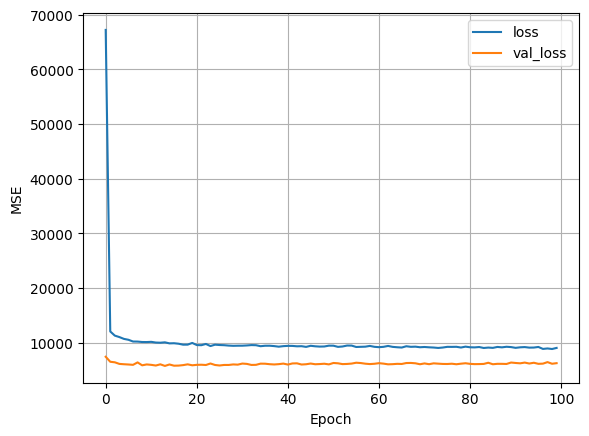

116/116 [==============================] - 0s 2ms/step - loss: 6110.2695
16 nodes, dropout 0.2, lr 0.005, batch size 128


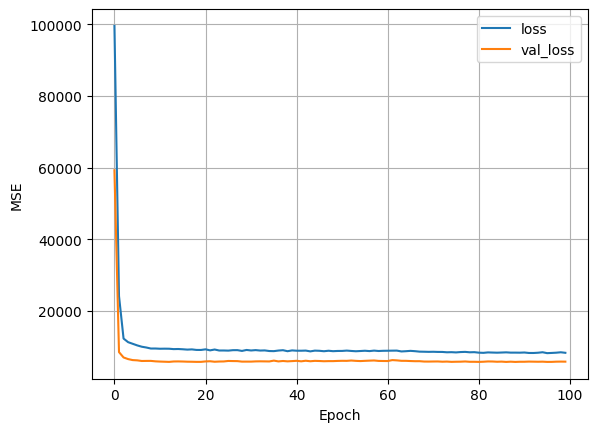

116/116 [==============================] - 0s 2ms/step - loss: 5682.9165
16 nodes, dropout 0.2, lr 0.001, batch size 32


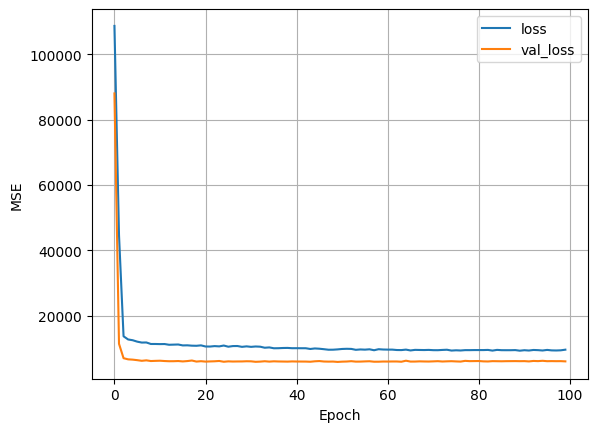

116/116 [==============================] - 0s 2ms/step - loss: 5781.2148
16 nodes, dropout 0.2, lr 0.001, batch size 64


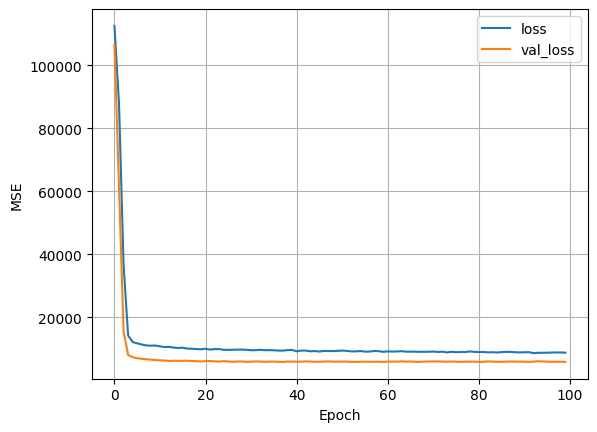

116/116 [==============================] - 0s 2ms/step - loss: 5599.0151
16 nodes, dropout 0.2, lr 0.001, batch size 128


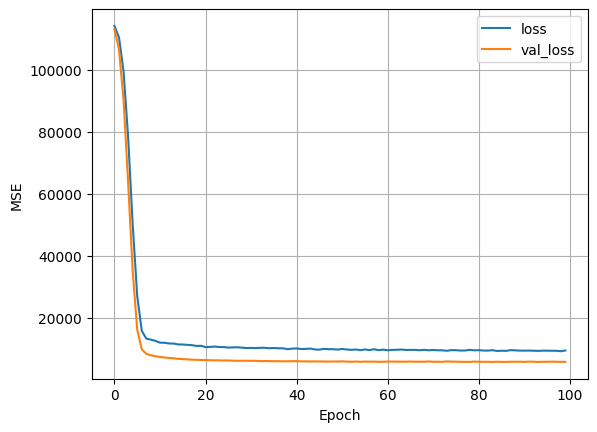

116/116 [==============================] - 0s 2ms/step - loss: 5642.6001
32 nodes, dropout 0, lr 0.01, batch size 32


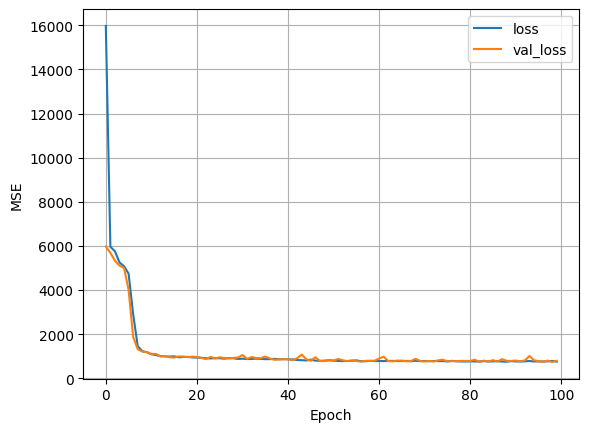

116/116 [==============================] - 0s 3ms/step - loss: 690.2111
32 nodes, dropout 0, lr 0.01, batch size 64


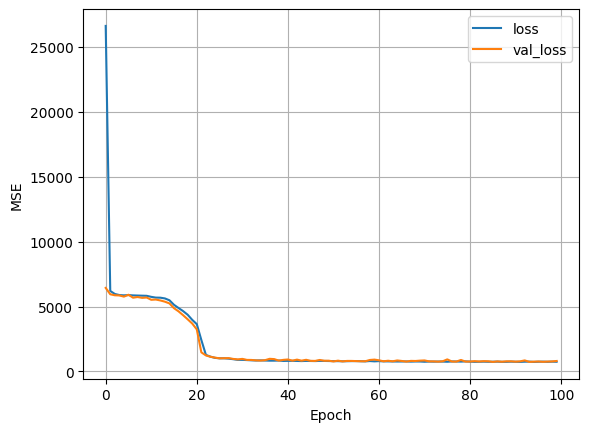

116/116 [==============================] - 0s 2ms/step - loss: 687.4583
32 nodes, dropout 0, lr 0.01, batch size 128


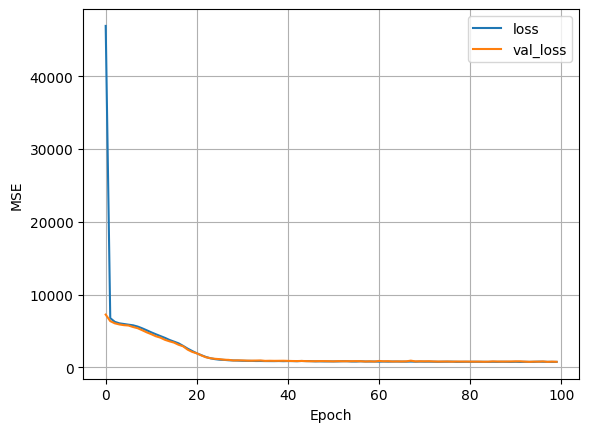

116/116 [==============================] - 0s 2ms/step - loss: 646.7095
32 nodes, dropout 0, lr 0.005, batch size 32


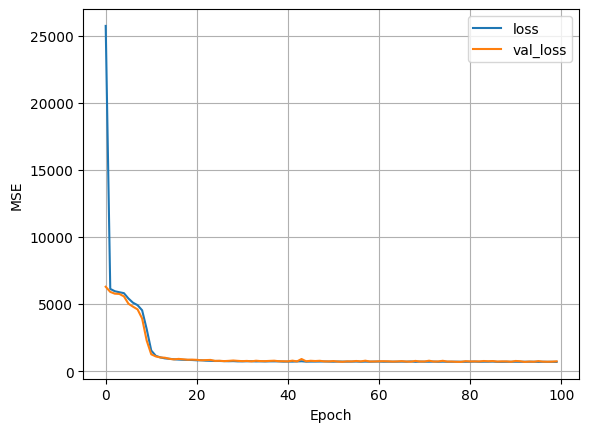

116/116 [==============================] - 0s 2ms/step - loss: 635.5963
32 nodes, dropout 0, lr 0.005, batch size 64


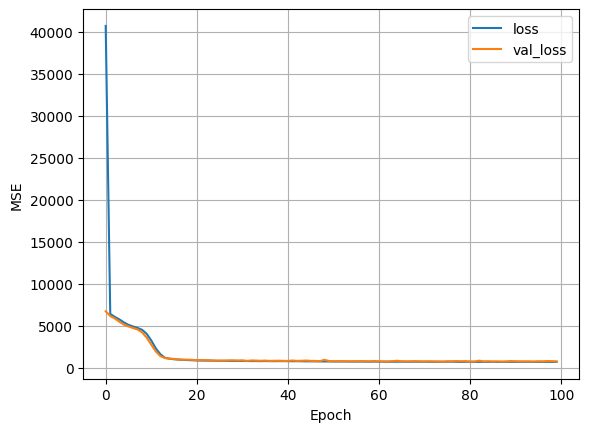

116/116 [==============================] - 0s 2ms/step - loss: 688.0858
32 nodes, dropout 0, lr 0.005, batch size 128


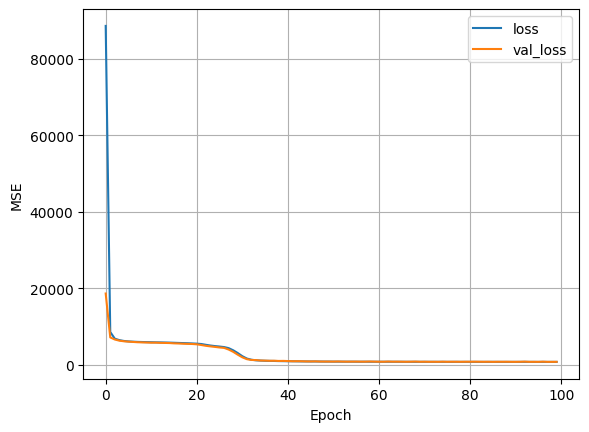

116/116 [==============================] - 0s 2ms/step - loss: 643.5528
32 nodes, dropout 0, lr 0.001, batch size 32


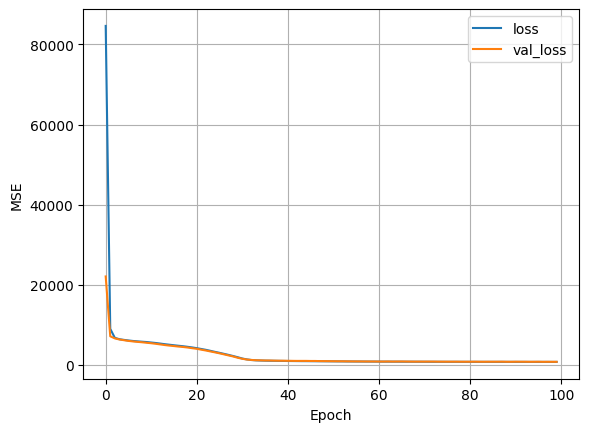

116/116 [==============================] - 0s 3ms/step - loss: 730.0752
32 nodes, dropout 0, lr 0.001, batch size 64


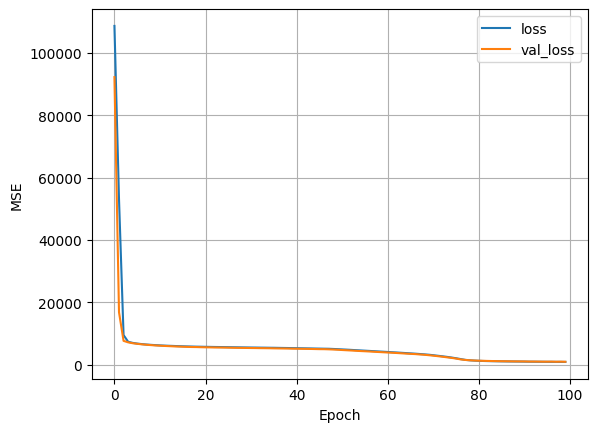

116/116 [==============================] - 0s 3ms/step - loss: 730.8374
32 nodes, dropout 0, lr 0.001, batch size 128


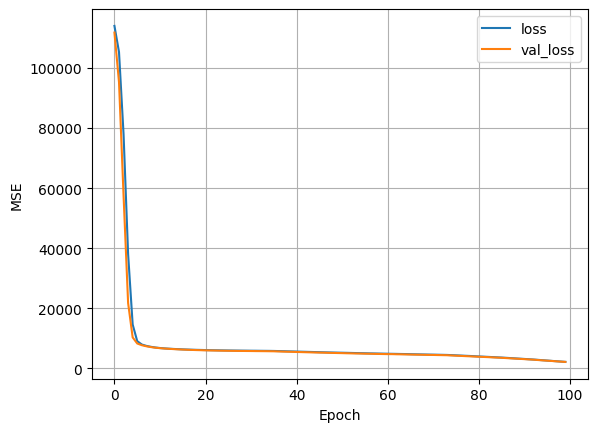

116/116 [==============================] - 0s 2ms/step - loss: 2028.5111
32 nodes, dropout 0.2, lr 0.01, batch size 32


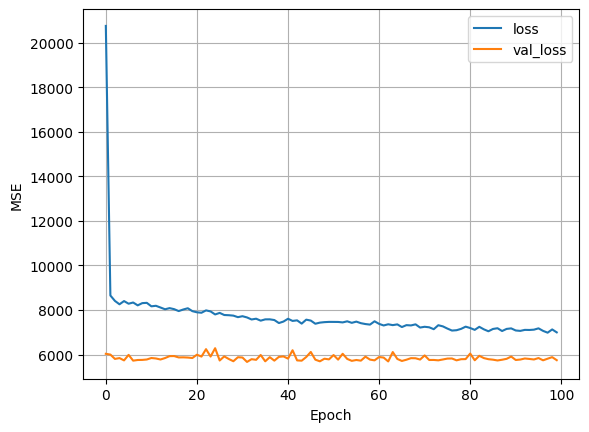

116/116 [==============================] - 0s 2ms/step - loss: 5477.8564
32 nodes, dropout 0.2, lr 0.01, batch size 64


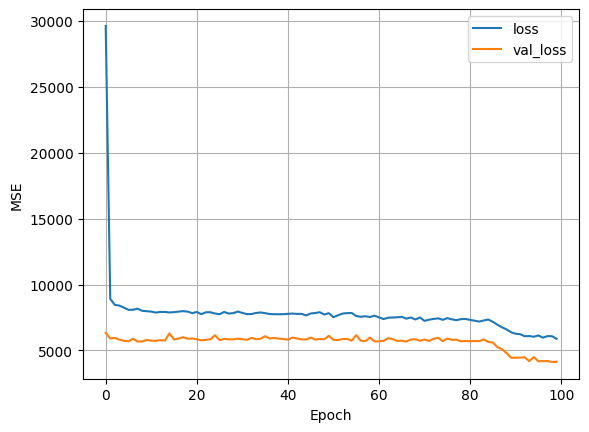

116/116 [==============================] - 0s 2ms/step - loss: 3983.9216
32 nodes, dropout 0.2, lr 0.01, batch size 128


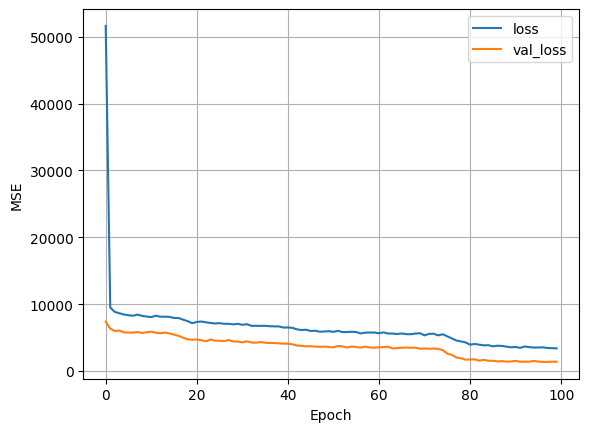

116/116 [==============================] - 0s 3ms/step - loss: 1231.7129
32 nodes, dropout 0.2, lr 0.005, batch size 32


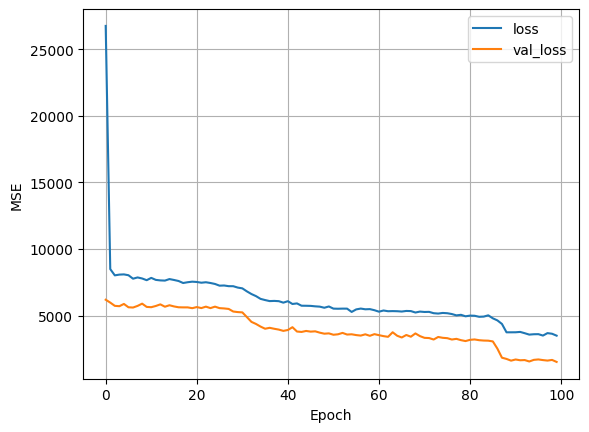

116/116 [==============================] - 0s 3ms/step - loss: 1344.5375
32 nodes, dropout 0.2, lr 0.005, batch size 64


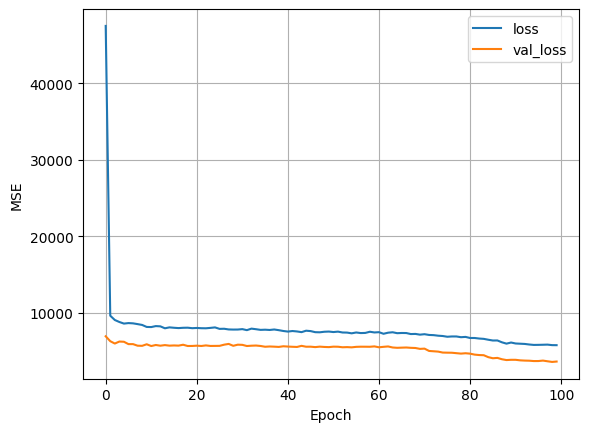

116/116 [==============================] - 0s 3ms/step - loss: 3519.8767
32 nodes, dropout 0.2, lr 0.005, batch size 128


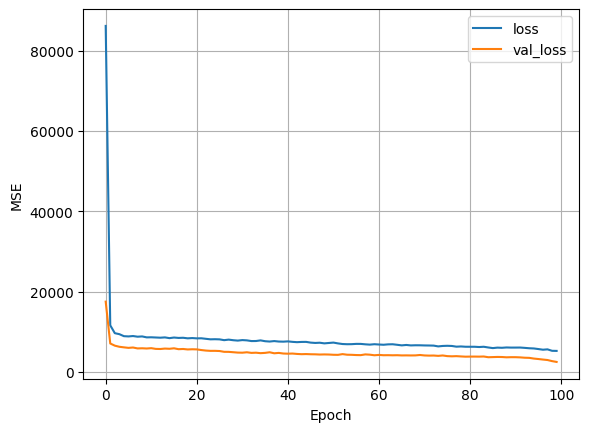

116/116 [==============================] - 0s 2ms/step - loss: 2341.2295
32 nodes, dropout 0.2, lr 0.001, batch size 32


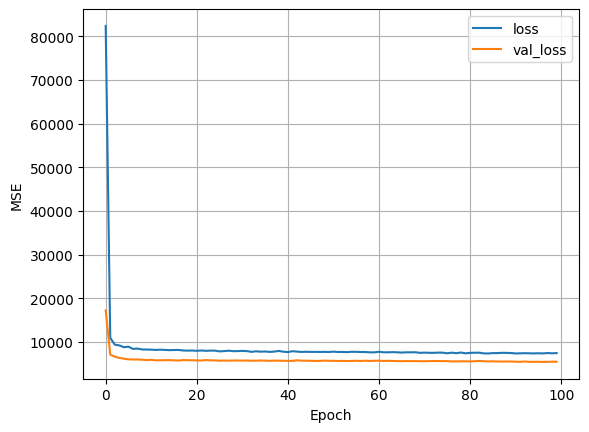

116/116 [==============================] - 0s 2ms/step - loss: 5327.0962
32 nodes, dropout 0.2, lr 0.001, batch size 64


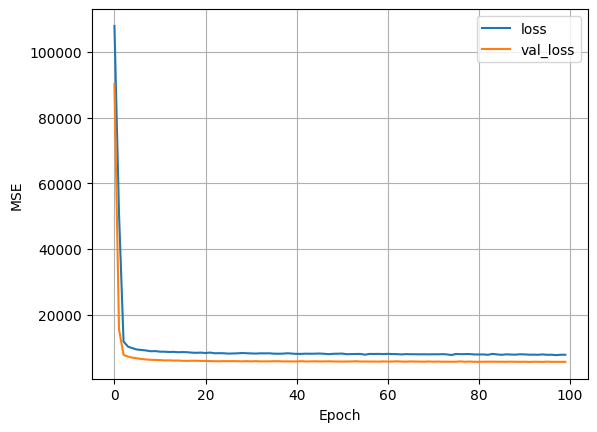

116/116 [==============================] - 0s 2ms/step - loss: 5416.9556
32 nodes, dropout 0.2, lr 0.001, batch size 128


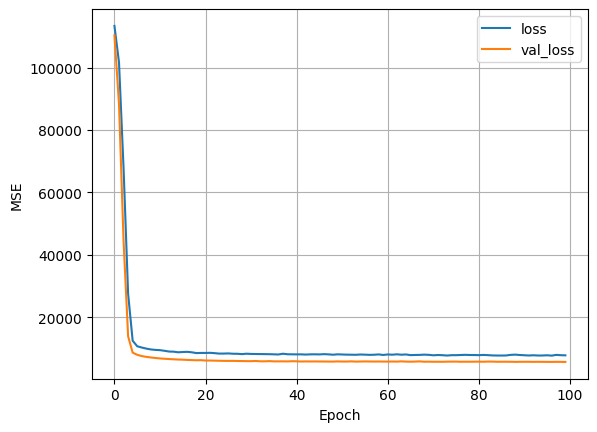

116/116 [==============================] - 0s 2ms/step - loss: 5445.6138
64 nodes, dropout 0, lr 0.01, batch size 32


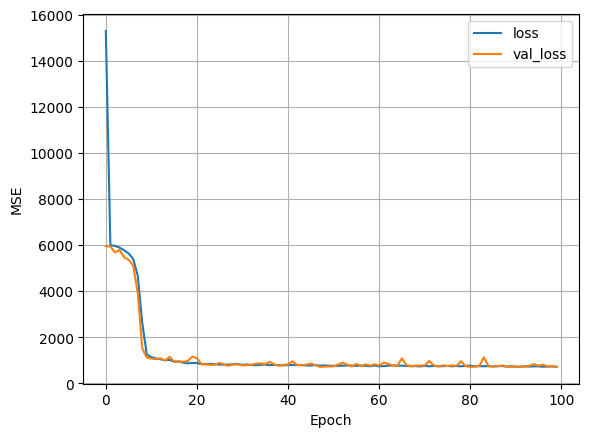

116/116 [==============================] - 0s 2ms/step - loss: 624.5046
64 nodes, dropout 0, lr 0.01, batch size 64


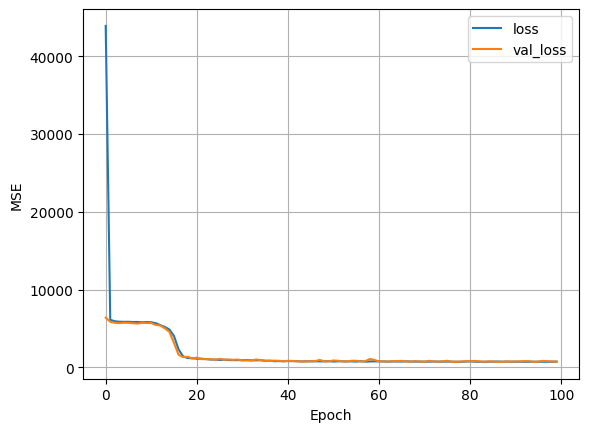

116/116 [==============================] - 0s 2ms/step - loss: 651.9373
64 nodes, dropout 0, lr 0.01, batch size 128


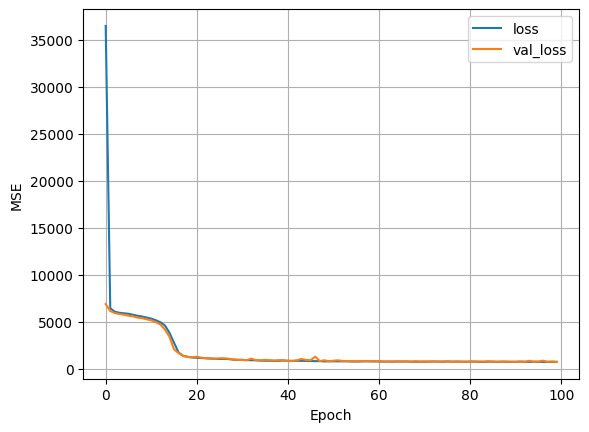

116/116 [==============================] - 0s 2ms/step - loss: 648.9736
64 nodes, dropout 0, lr 0.005, batch size 32


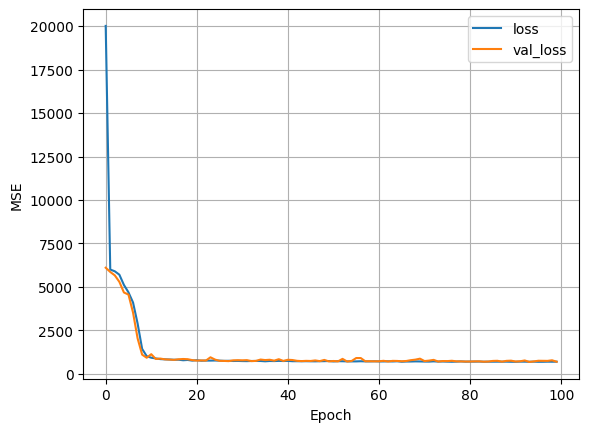

116/116 [==============================] - 0s 2ms/step - loss: 590.9182
64 nodes, dropout 0, lr 0.005, batch size 64


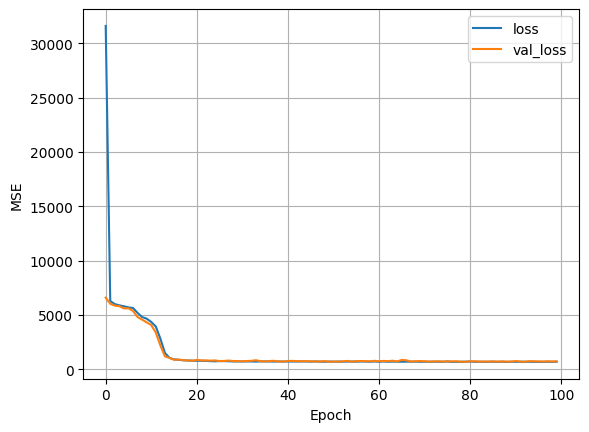

116/116 [==============================] - 0s 2ms/step - loss: 615.0284
64 nodes, dropout 0, lr 0.005, batch size 128


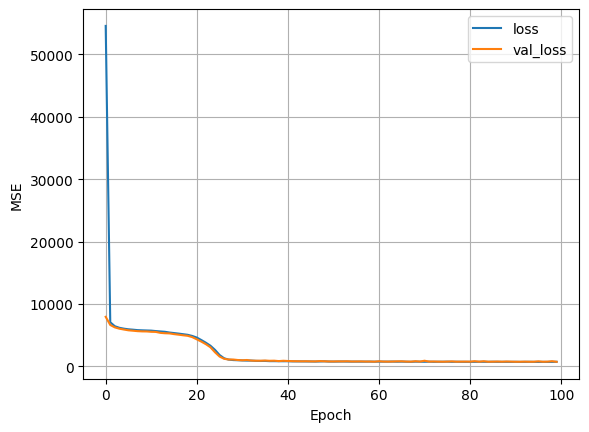

116/116 [==============================] - 0s 2ms/step - loss: 635.2473
64 nodes, dropout 0, lr 0.001, batch size 32


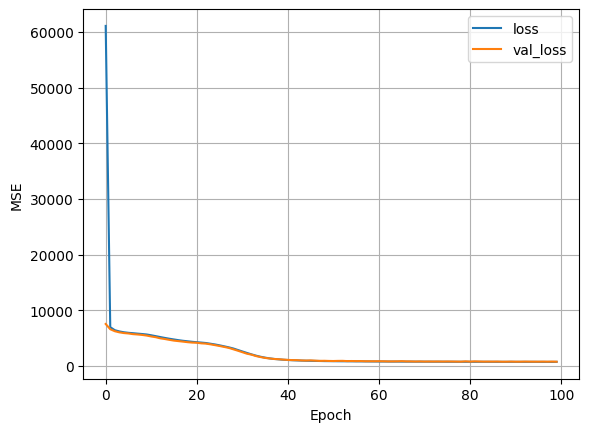

116/116 [==============================] - 0s 3ms/step - loss: 626.8844
64 nodes, dropout 0, lr 0.001, batch size 64


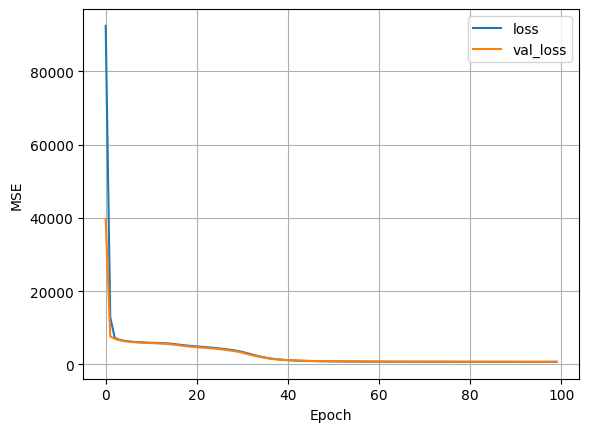

116/116 [==============================] - 0s 3ms/step - loss: 656.4876
64 nodes, dropout 0, lr 0.001, batch size 128


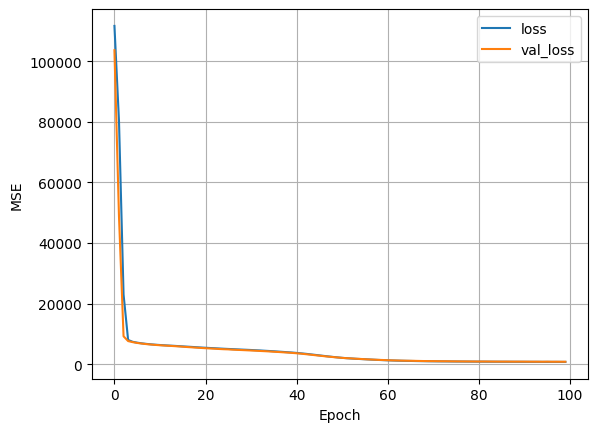

116/116 [==============================] - 0s 2ms/step - loss: 680.8725
64 nodes, dropout 0.2, lr 0.01, batch size 32


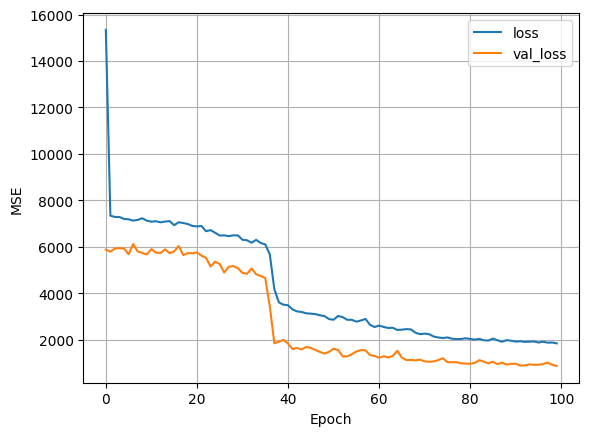

116/116 [==============================] - 0s 2ms/step - loss: 746.1640
64 nodes, dropout 0.2, lr 0.01, batch size 64


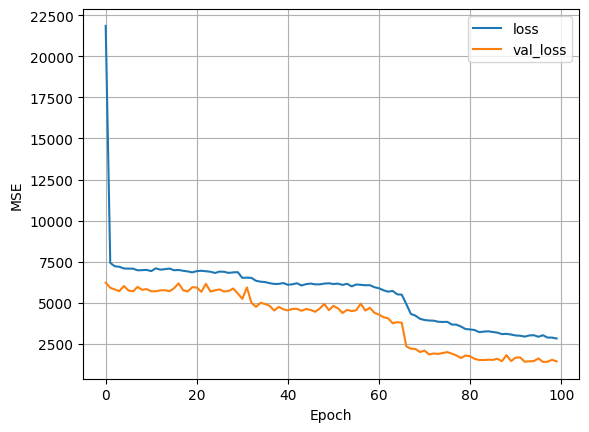

116/116 [==============================] - 0s 2ms/step - loss: 1259.3295
64 nodes, dropout 0.2, lr 0.01, batch size 128


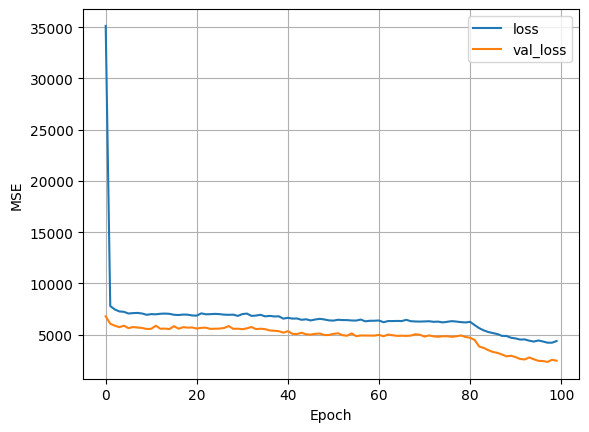

116/116 [==============================] - 0s 2ms/step - loss: 2398.2227
64 nodes, dropout 0.2, lr 0.005, batch size 32


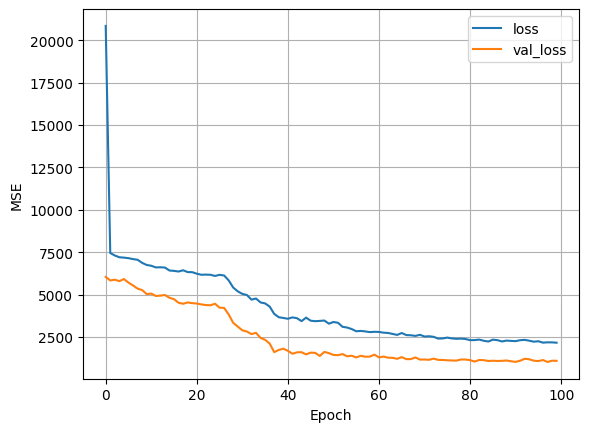

116/116 [==============================] - 0s 2ms/step - loss: 932.0844
64 nodes, dropout 0.2, lr 0.005, batch size 64


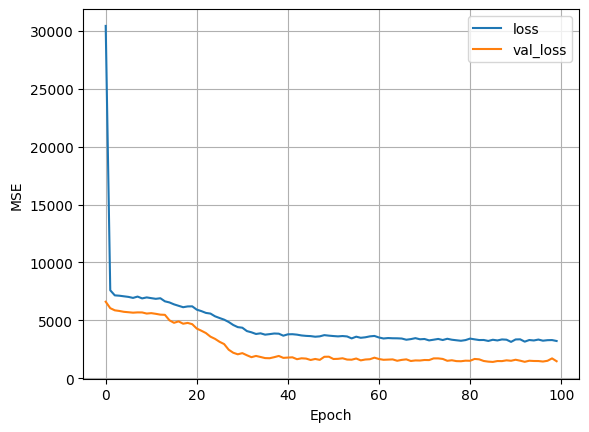

116/116 [==============================] - 0s 2ms/step - loss: 1304.7106
64 nodes, dropout 0.2, lr 0.005, batch size 128


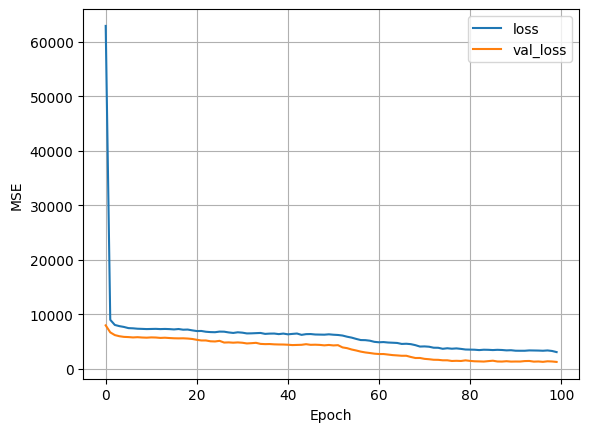

116/116 [==============================] - 0s 2ms/step - loss: 1115.1613
64 nodes, dropout 0.2, lr 0.001, batch size 32


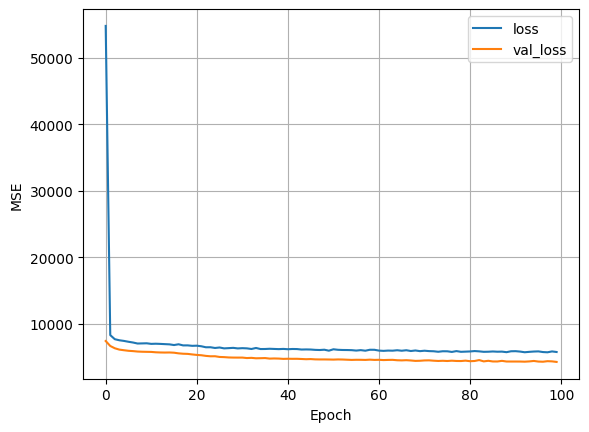

116/116 [==============================] - 0s 2ms/step - loss: 4188.2598
64 nodes, dropout 0.2, lr 0.001, batch size 64


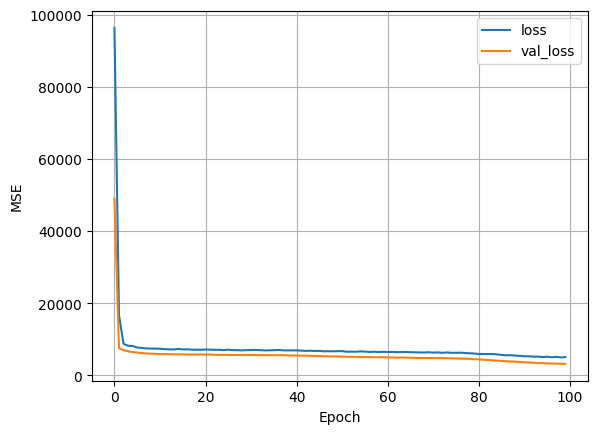

116/116 [==============================] - 0s 2ms/step - loss: 3013.8298
64 nodes, dropout 0.2, lr 0.001, batch size 128


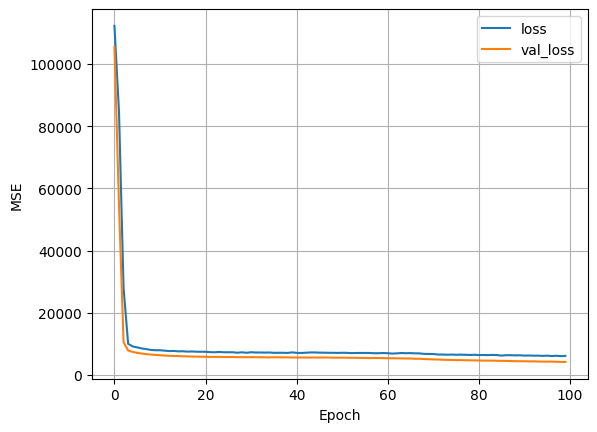

116/116 [==============================] - 0s 2ms/step - loss: 4137.3052


In [128]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train_norm, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss(history)
        val_loss = model.evaluate(x_test_norm, y_test)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [129]:
y_pred_nn = least_loss_model.predict(x_test_norm)

116/116 [==============================] - 0s 2ms/step


In [130]:
print(f'The MSE for Model ridge is: {mean_squared_error(y_test, y_pred_nn)}')

The MSE for Model ridge is: 590.9180922588417


In [131]:
print(f'The MAE for Model ridge is: {mean_absolute_error(y_test, y_pred_nn)}')

The MAE for Model ridge is: 16.713153512306246


In [132]:
print(f'The R2 score for Model Ridge is: {r2_score(y_test, y_pred_nn)}')

The R2 score for Model Ridge is: 0.9512721293262332


In [142]:
x_try = X_test.iloc[2]
print(x_try)
print(f'The target should be: {y_test.iloc[2]}')
arr = x_try.values
reshaped_arr = arr.reshape((1, -1))
print(reshaped_arr.shape)
print(X_test.shape)

Region                 5
Tipo_Producto          4
Compania_Bandera       2
Anio                2023
Mes                   10
Name: 6614, dtype: int64
The target should be: 289
(1, 5)
(3709, 5)


In [143]:
reshaped_arr_norm = scaler.transform(reshaped_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [144]:
y_pred_try = least_loss_model.predict(reshaped_arr_norm)
print(f'La prediccion del algoritmo es: {y_pred_try[0]}')

1/1 [==============================] - 0s 26ms/step
La prediccion del algoritmo es: [299.08334]
